In [1]:
#loading the required librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from feature_engine.outlier_removers import Winsorizer
from feature_engine import variable_transformers as vt
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



In [2]:
# let's load the Boston dataset
boston=load_boston()
bos=pd.DataFrame(boston.data)
bos.head()# checking the 1st five columns

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [4]:
print(boston.target.shape)

(506,)


In [5]:
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [6]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(boston.DESCR)#The DESCR method will provide the dataset characteristics for the Boston dataset.



.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
bos.columns #  checking the columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [10]:
bos.info() # checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [11]:
bos.isnull().mean() # checking the percentage of  null value for each feature

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
PRICE      0.0
dtype: float64

 Hence conclude no missing value present inside the Dataset.

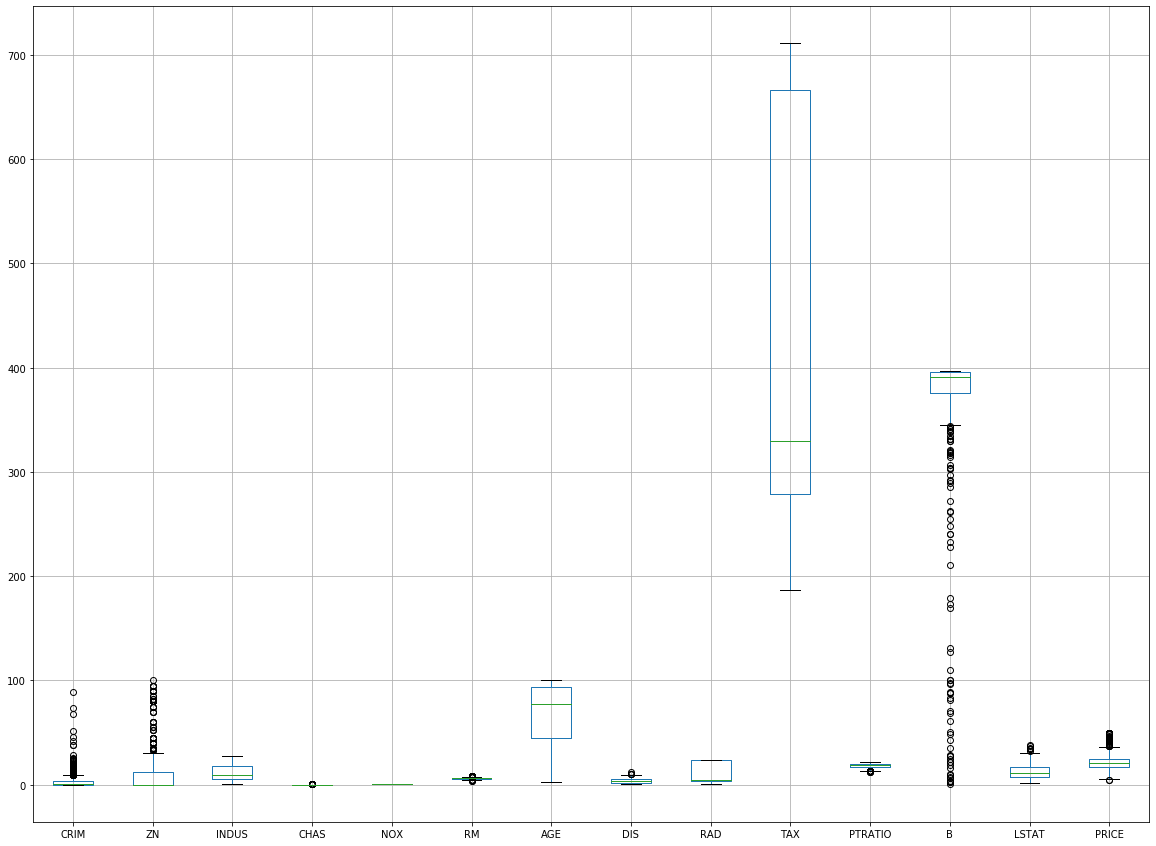

In [12]:
boxplot = bos.boxplot(column=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT','PRICE'],figsize=(20,15))


In [13]:
def detection(df,variables):
    plt.figure(figsize=(25,10))
    
    #  Drawing histogram
    plt.subplot(1,3,1)
    sns.distplot(df[variables],bins=20)
    plt.title("Histogram")
    
    # Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[variables],dist="norm",plot=plt)
    plt.ylabel("RM quantiles")
    
    
    # outlier Detection
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variables])
    plt.title("Box-plot")
    
    plt.show

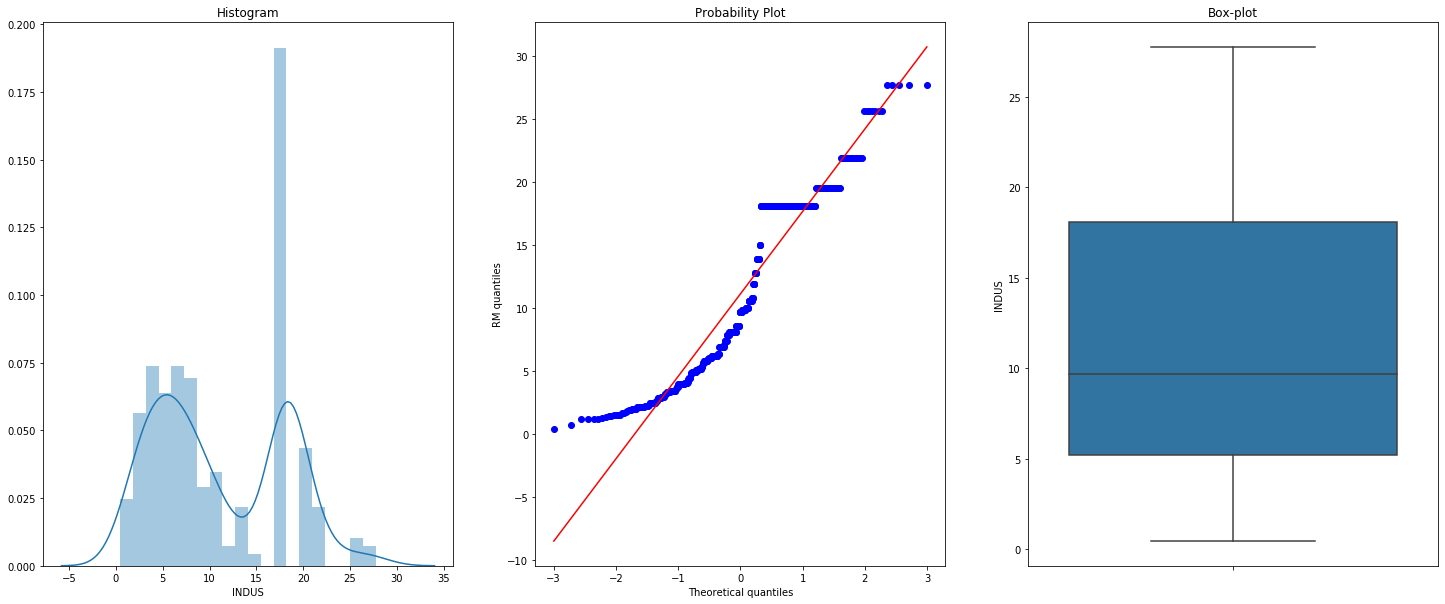

In [14]:
v=detection(bos,'INDUS')
v

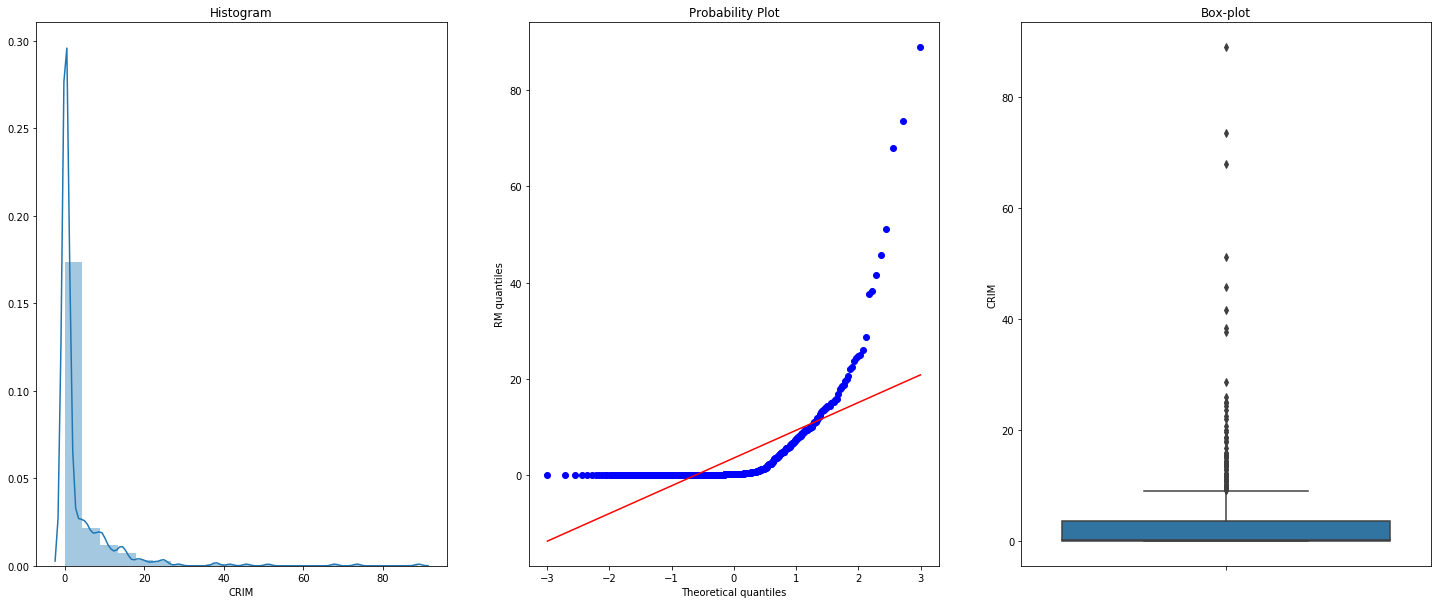

In [15]:
op=detection(bos,'CRIM')
op

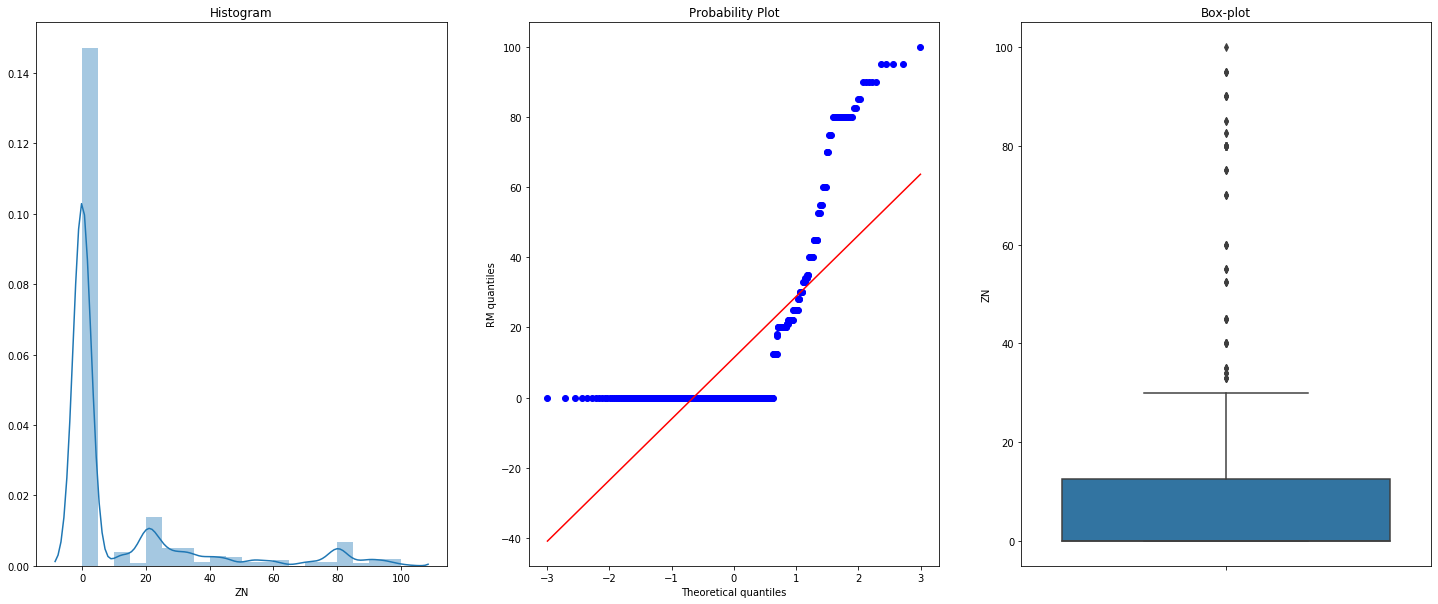

In [16]:
o=detection(bos,'ZN')
o

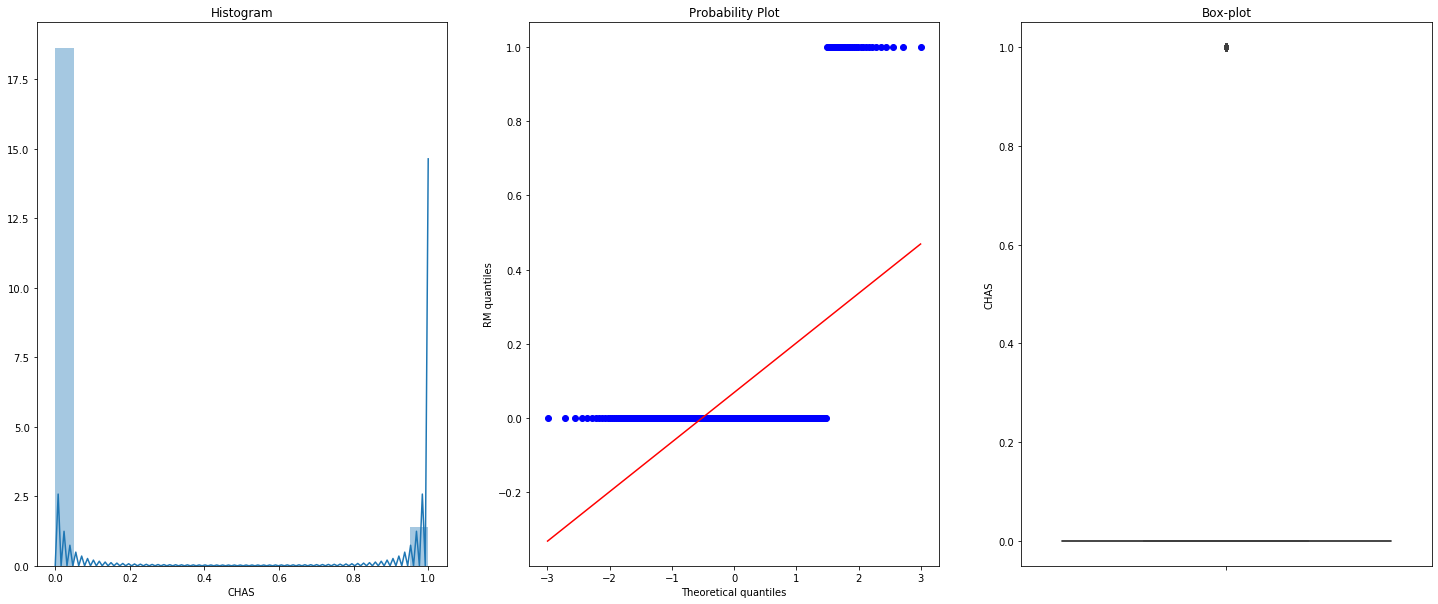

In [17]:
p=detection(bos,"CHAS")
p

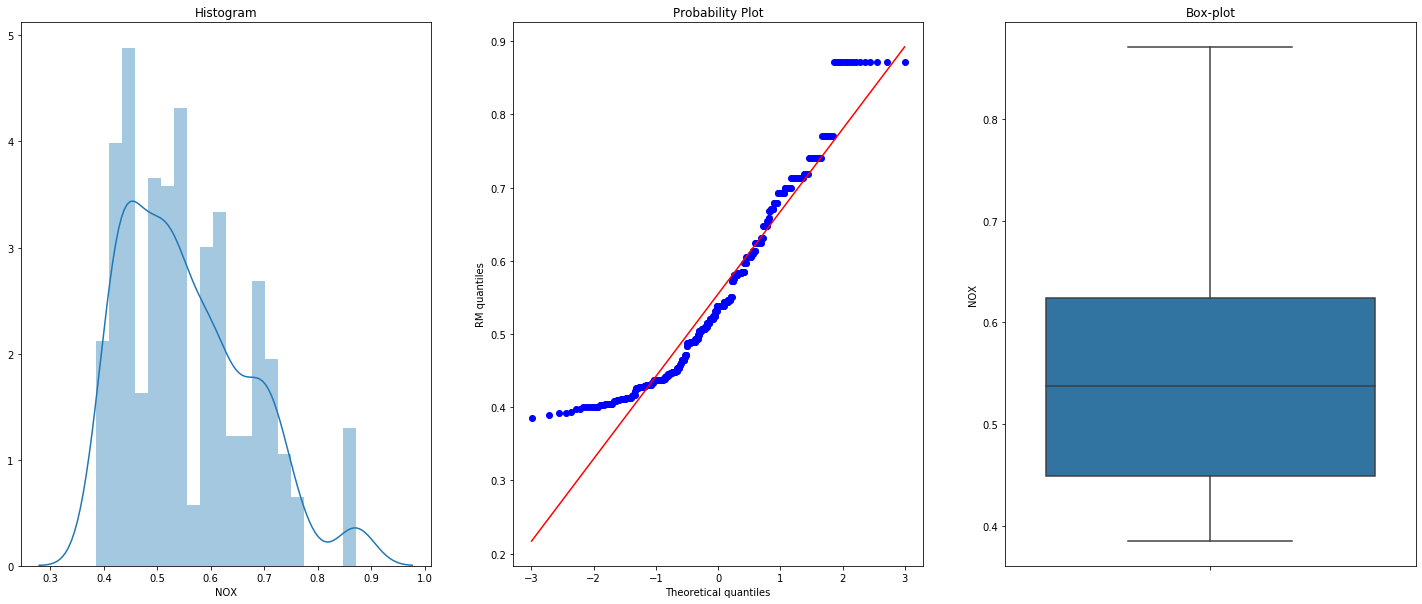

In [18]:
l=detection(bos,"NOX")
l

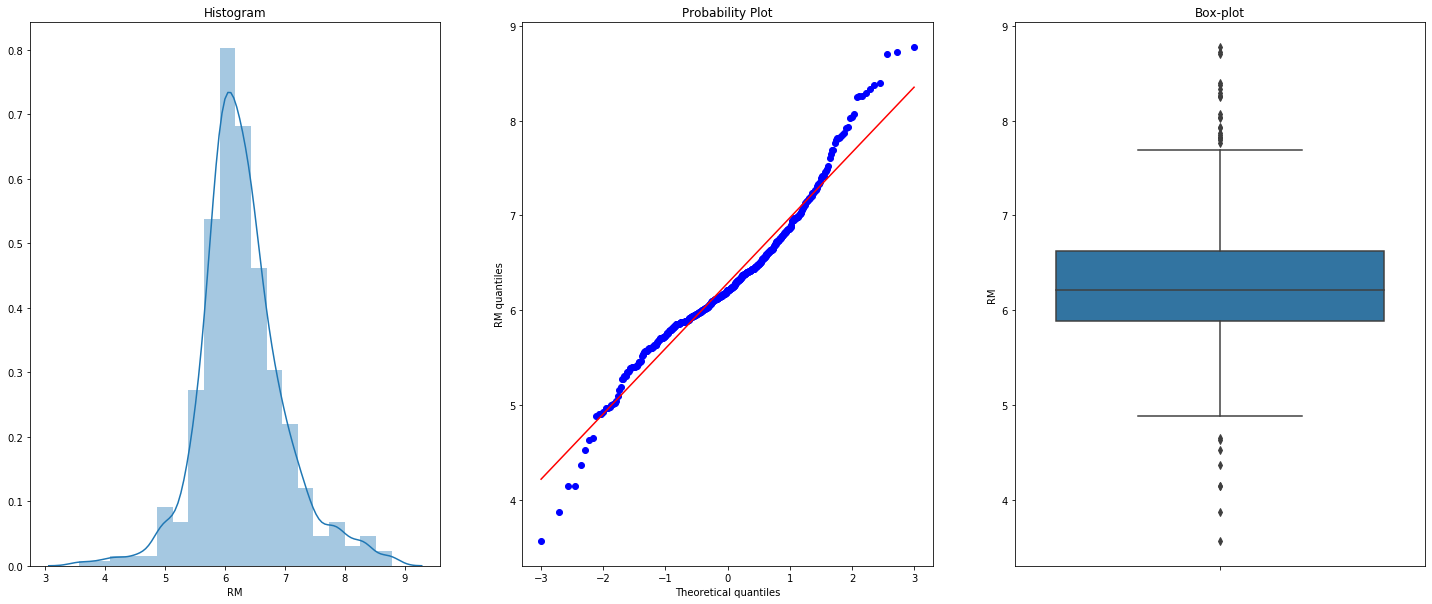

In [19]:
l=detection(bos,'RM')
l

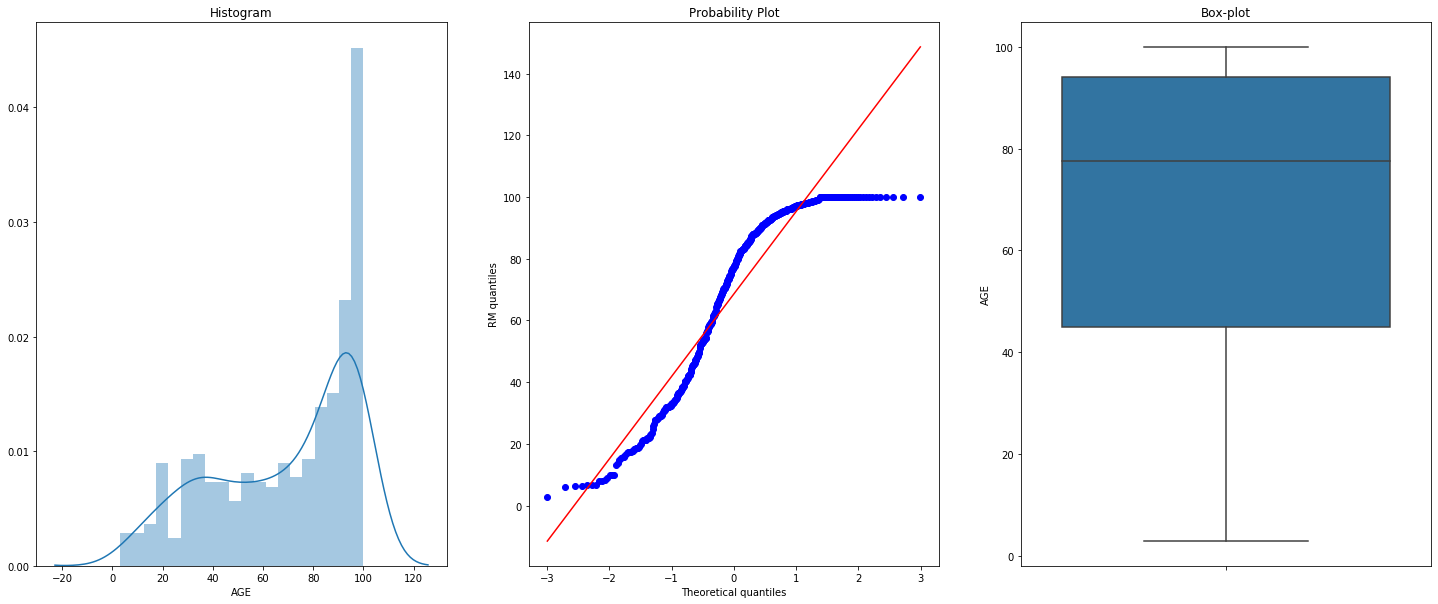

In [20]:
f=detection(bos,'AGE')
f

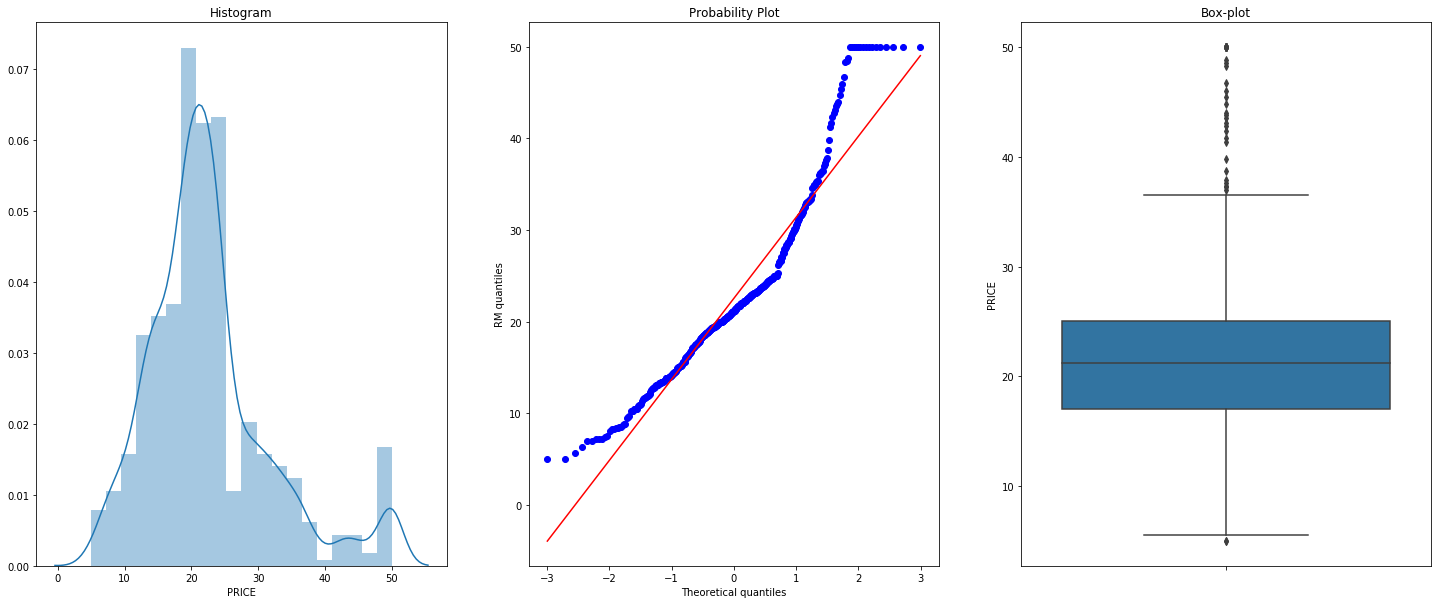

In [21]:
po=detection(bos,'PRICE')
po

In [22]:
# teating outlier
def teat(df,variable,wisker_range):
    iqr=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    ll=df[variable].quantile(0.25)-(iqr*wisker_range)
    #Low = (Q1) – 1.5 IQR
    ul=df[variable].quantile(0.75)+(iqr*wisker_range)
    # High = (Q3) + 1.5 IQR
    
    return iqr,ll,ul

    

In [23]:
c_iqr,c_ll,c_ul=teat(bos,"CRIM",1.5)
c_iqr,c_ll,c_ul


(3.5950375, -5.31051125, 9.06963875)

In [24]:
z_iqr,z_ll,z_ul=teat(bos,"ZN",1.5)
z_iqr,z_ll,z_ul

(12.5, -18.75, 31.25)

In [25]:
i_iqr,i_ll,i_ul=teat(bos,"INDUS",1.5)
i_iqr,i_ll,i_ul


(12.91, -14.175, 37.465)

In [26]:
c_iqr,c_ll,c_ul=teat(bos,"CHAS",1.5)
c_iqr,c_ll,c_ul

(0.0, 0.0, 0.0)

In [27]:
n_iqr,n_ll,n_ul=teat(bos,"NOX",1.5)
n_iqr,n_ll,n_ul

(0.175, 0.18650000000000005, 0.8865)

In [28]:
r_iqr,r_ll,r_ul=teat(bos,"RM",1.5)
r_iqr,r_ll,r_ul



(0.7379999999999995, 4.778500000000001, 7.730499999999999)

In [337]:
a_iqr,a_ll,a_ul=teat(bos,"AGE",1.5)
a_iqr,a_ll,a_ul

(49.04999999999999, -28.54999999999999, 167.64999999999998)

In [338]:
d_iqr,d_ll,d_ul=teat(bos,"DIS",1.5)
d_iqr,d_ll,d_ul

(3.0882500000000004, -2.5322000000000005, 9.820800000000002)

In [339]:
r_iqr,r_ll,r_ul=teat(bos,"RAD",1.5)
r_iqr,r_ll,r_ul

(20.0, -26.0, 54.0)

In [340]:
t_iqr,t_ll,t_ul=teat(bos,"TAX",1.5)
t_iqr,t_ll,t_ul

(387.0, -301.5, 1246.5)

In [341]:
p_iqr,p_ll,p_ul=teat(bos,"PTRATIO",1.5)
p_iqr,p_ll,p_ul

(2.8000000000000007, 13.199999999999998, 24.4)

In [342]:
b_iqr,b_ll,b_ul=teat(bos,"B",1.5)
b_iqr,b_ll,b_ul

(20.847500000000025, 344.10624999999993, 427.49625000000003)

In [343]:
l_iqr,l_ll,l_ul=teat(bos,"LSTAT",1.5)
l_iqr,l_ll,l_ul

(10.005000000000003, -8.057500000000005, 31.962500000000006)

In [76]:
z = np.abs(stats.zscore(bos))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [77]:
df = np.where(z < 3)#As we know in 3 Standard Deviations from the Mean we are covering almost all 99.7% of data points.
#The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

In [78]:
z[df[1][0]]

array([0.41978194, 0.28482986, 1.2879095 , 0.27259857, 0.14421743,
       0.41367189, 0.12001342, 0.1402136 , 0.98284286, 0.66660821,
       1.45900038, 0.44105193, 1.0755623 , 0.15968566])

In [79]:
len(df[1]),len(df[0])

(6984, 6984)

In [80]:
#Removing the oulier from each feature.
td=(bos["CRIM"]>-5.310) & (bos["CRIM"]<9.069)
td.head()

0    True
1    True
2    True
3    True
4    True
Name: CRIM, dtype: bool

In [25]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [26]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(bos, 'CRIM', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(9.06963875, -5.31051125)

In [27]:
# Now let's replace the outliers by the maximum and minimum limit

bos['CRIM']= np.where(bos['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(bos['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, bos['CRIM']))

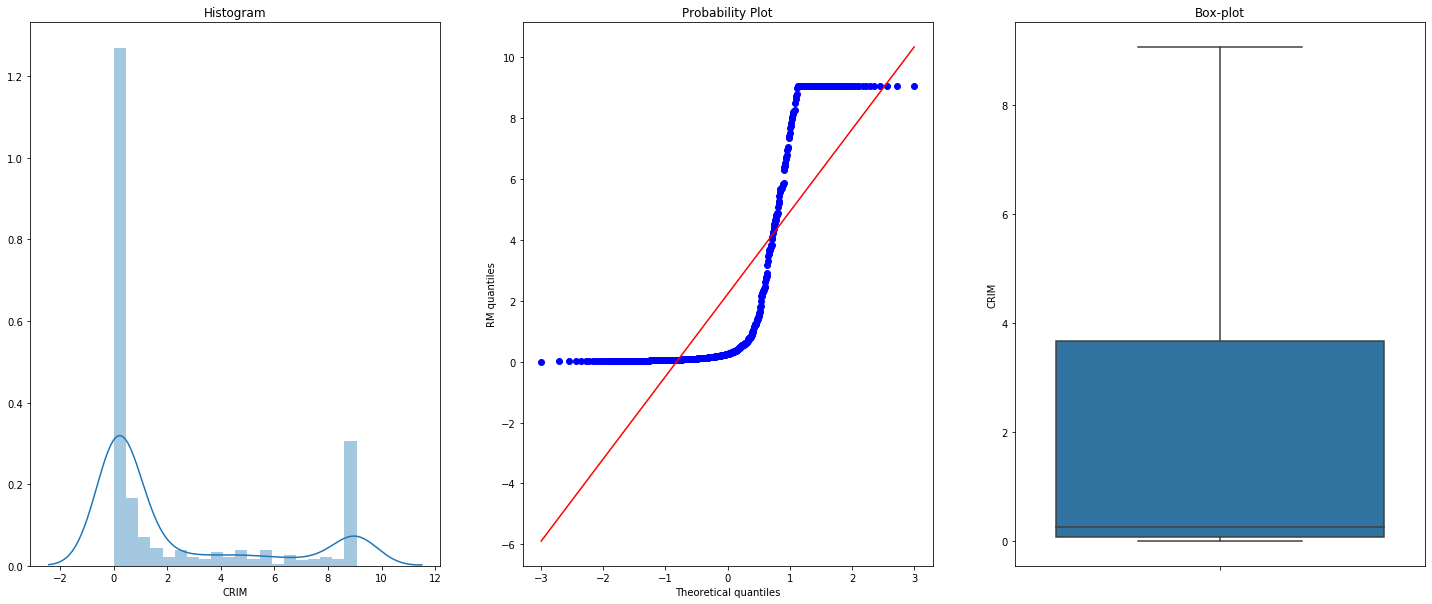

In [28]:
lk=detection(bos,'CRIM')
lk

In [29]:
# Here we are applying the capper_IQR_proximation rule  for treating outlier. 
# lets treat the oulier using feature engine
# creat  capper
windsoriser = Winsorizer(distribution='skewed', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'])

windsoriser.fit(bos)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                      'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [30]:
winds_trans=windsoriser.transform(bos) # Transforming the dataset.

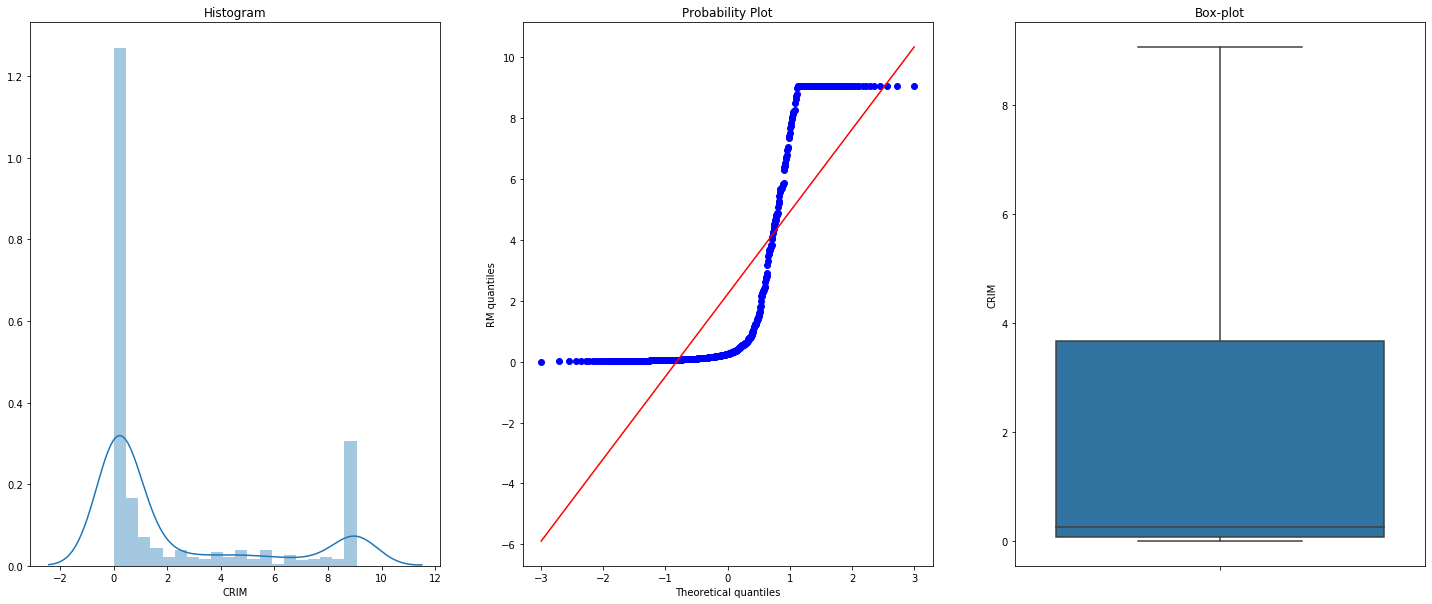

In [31]:
gk=detection(bos,'CRIM')
gk

In [32]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

{'CRIM': -5.31051125,
 'ZN': -18.75,
 'INDUS': -14.175,
 'CHAS': 0.0,
 'NOX': 0.18650000000000005,
 'RM': 4.778500000000001,
 'AGE': -28.54999999999999,
 'DIS': -2.5322000000000005,
 'RAD': -26.0,
 'TAX': -301.5,
 'PTRATIO': 13.199999999999998,
 'B': 344.10624999999993,
 'LSTAT': -8.057500000000005}

In [33]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

{'CRIM': -5.31051125,
 'ZN': -18.75,
 'INDUS': -14.175,
 'CHAS': 0.0,
 'NOX': 0.18650000000000005,
 'RM': 4.778500000000001,
 'AGE': -28.54999999999999,
 'DIS': -2.5322000000000005,
 'RAD': -26.0,
 'TAX': -301.5,
 'PTRATIO': 13.199999999999998,
 'B': 344.10624999999993,
 'LSTAT': -8.057500000000005}

In [34]:
bos.isnull().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
PRICE      0.0
dtype: float64

In [35]:
#RFE (Recursive Feature Elimination)
model=LinearRegression()# creat a base classifier to evalute the subset of base classifier.

In [36]:
rfe=RFE(model,8,verbose=0)

In [37]:
rfe=rfe.fit(boston.data,boston.target)
rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=8, step=1, verbose=0)

In [38]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True  True  True False  True  True False  True False
  True]
[1 3 2 1 1 1 6 1 1 4 1 5 1]


In [39]:
X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
y = bos['PRICE']

In [40]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.647060


In [41]:
cols = list(bos.columns)
model = LinearRegression()#Initializing RFE model
rfe = RFE(model, 10)             #Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  #Fitting the data to model
model.fit(X_rfe,y) 
print(rfe.support_)
temp = pd.Series(rfe.support_)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

[ True  True  True  True  True  True False  True  True False  True False
  True]
Int64Index([0, 1, 2, 3, 4, 5, 7, 8, 10, 12], dtype='int64')


In [42]:
bos.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,2.225032,3.313353,0.00632,0.082045,0.25651,3.677083,9.069639
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.000000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.740000
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.000000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.871000
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.780000
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.000000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.126500
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.000000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.000000


In [43]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

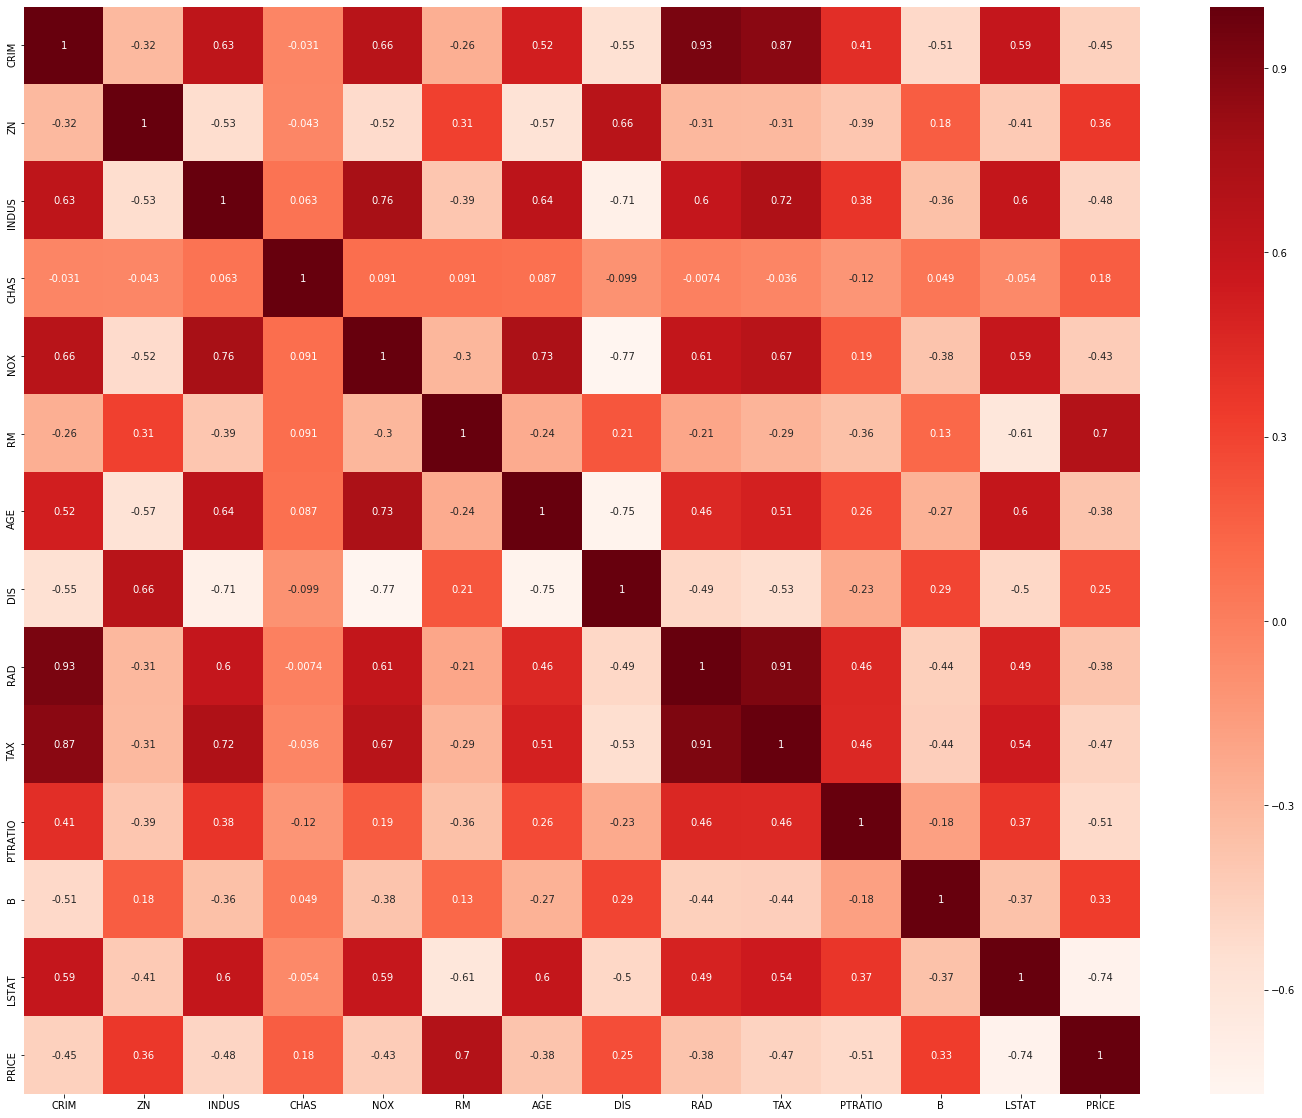

In [44]:
# let's use the filter method  for selecting the best features.
#Using Pearson Correlation
plt.figure(figsize=(25,20))
cor = bos.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

In [45]:
#Correlation with output variable
cor_target = abs(cor["PRICE"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features#Correlation with output variable
cor_target = abs(cor["PRICE"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

#As we can see, only the features RM, PTRATIO and LSTAT are highly correlated with the output variable PRICE.
#Hence we will drop all other features apart from these.
#If these variables are correlated with each other, then we need to keep only one of them and drop the rest.

# lets check the corelation feature with each other.
As we know One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. 

In [46]:
print(bos[["PRICE","LSTAT"]].corr())
print(bos[["PRICE","PTRATIO"]].corr())
print(bos[["RM","PRICE"]].corr())

          PRICE     LSTAT
PRICE  1.000000 -0.737663
LSTAT -0.737663  1.000000
            PRICE   PTRATIO
PRICE    1.000000 -0.507787
PTRATIO -0.507787  1.000000
            RM    PRICE
RM     1.00000  0.69536
PRICE  0.69536  1.00000


Hence from the above expriment we conclude that variables RM and PRICE are highly correlated with each other (0.693808).
Here we like to keep only one variable like PRICE or RM but in our case i keep PRICE forther calculation.

After dropping RM, we are left with two feature, LSTAT and PTRATIO. These are the final features given by Pearson correlation.


# univariate annlysis
-As we see from the above  test RM,PTRATIO,LSTAT,PRICE feature are highly correlated  to the output variable.hence we will drop all other features.


-One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other.
 Hence we conclude that their is some linear relationship between these 2 feature LSTAT & PRICE. Rest of the features are not having the linear relationship. 
 
 
-An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. 
 

In [47]:
# wapper method
#Backward Elimination-Here we are using performance metric for evaluate feature performance on pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.
#Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)#Fitting sm.OLS model
model = sm.OLS(Y,X_1).fit()
print(model.summary)


<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001E0113F5828>>


C:\Users\welcome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
model.pvalues

const      2.101751e-11
CRIM       5.921225e-02
ZN         8.859631e-04
INDUS      6.490685e-01
CHAS       2.021821e-03
NOX        2.116663e-05
RM         1.330127e-18
AGE        9.487149e-01
DIS        2.234122e-12
RAD        4.793152e-05
TAX        1.323867e-03
PTRATIO    1.720301e-12
B          7.591387e-04
LSTAT      1.865222e-21
dtype: float64

As we can see that the variable ‘AGE’ has highest pvalue of 0.9487149 which is greater than 0.05. Hence we will remove this feature and build the model once again.

let’s plot scatter plot to see how these features vary with price.

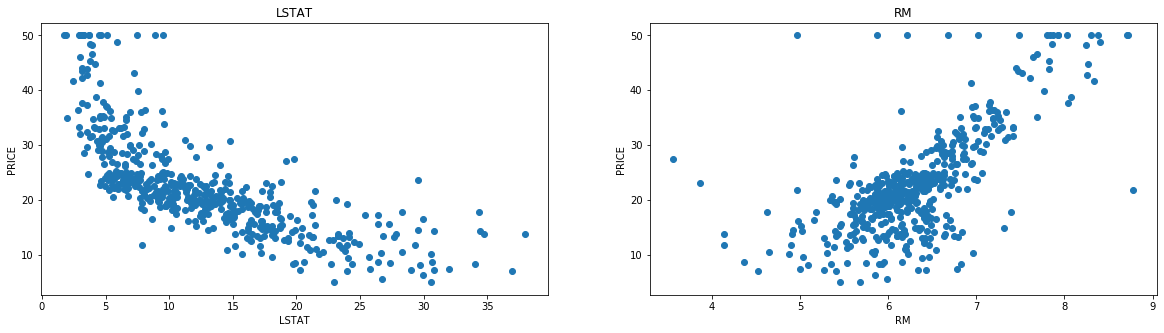

In [49]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

 The prices increase as the value of RM increases linearly. 
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

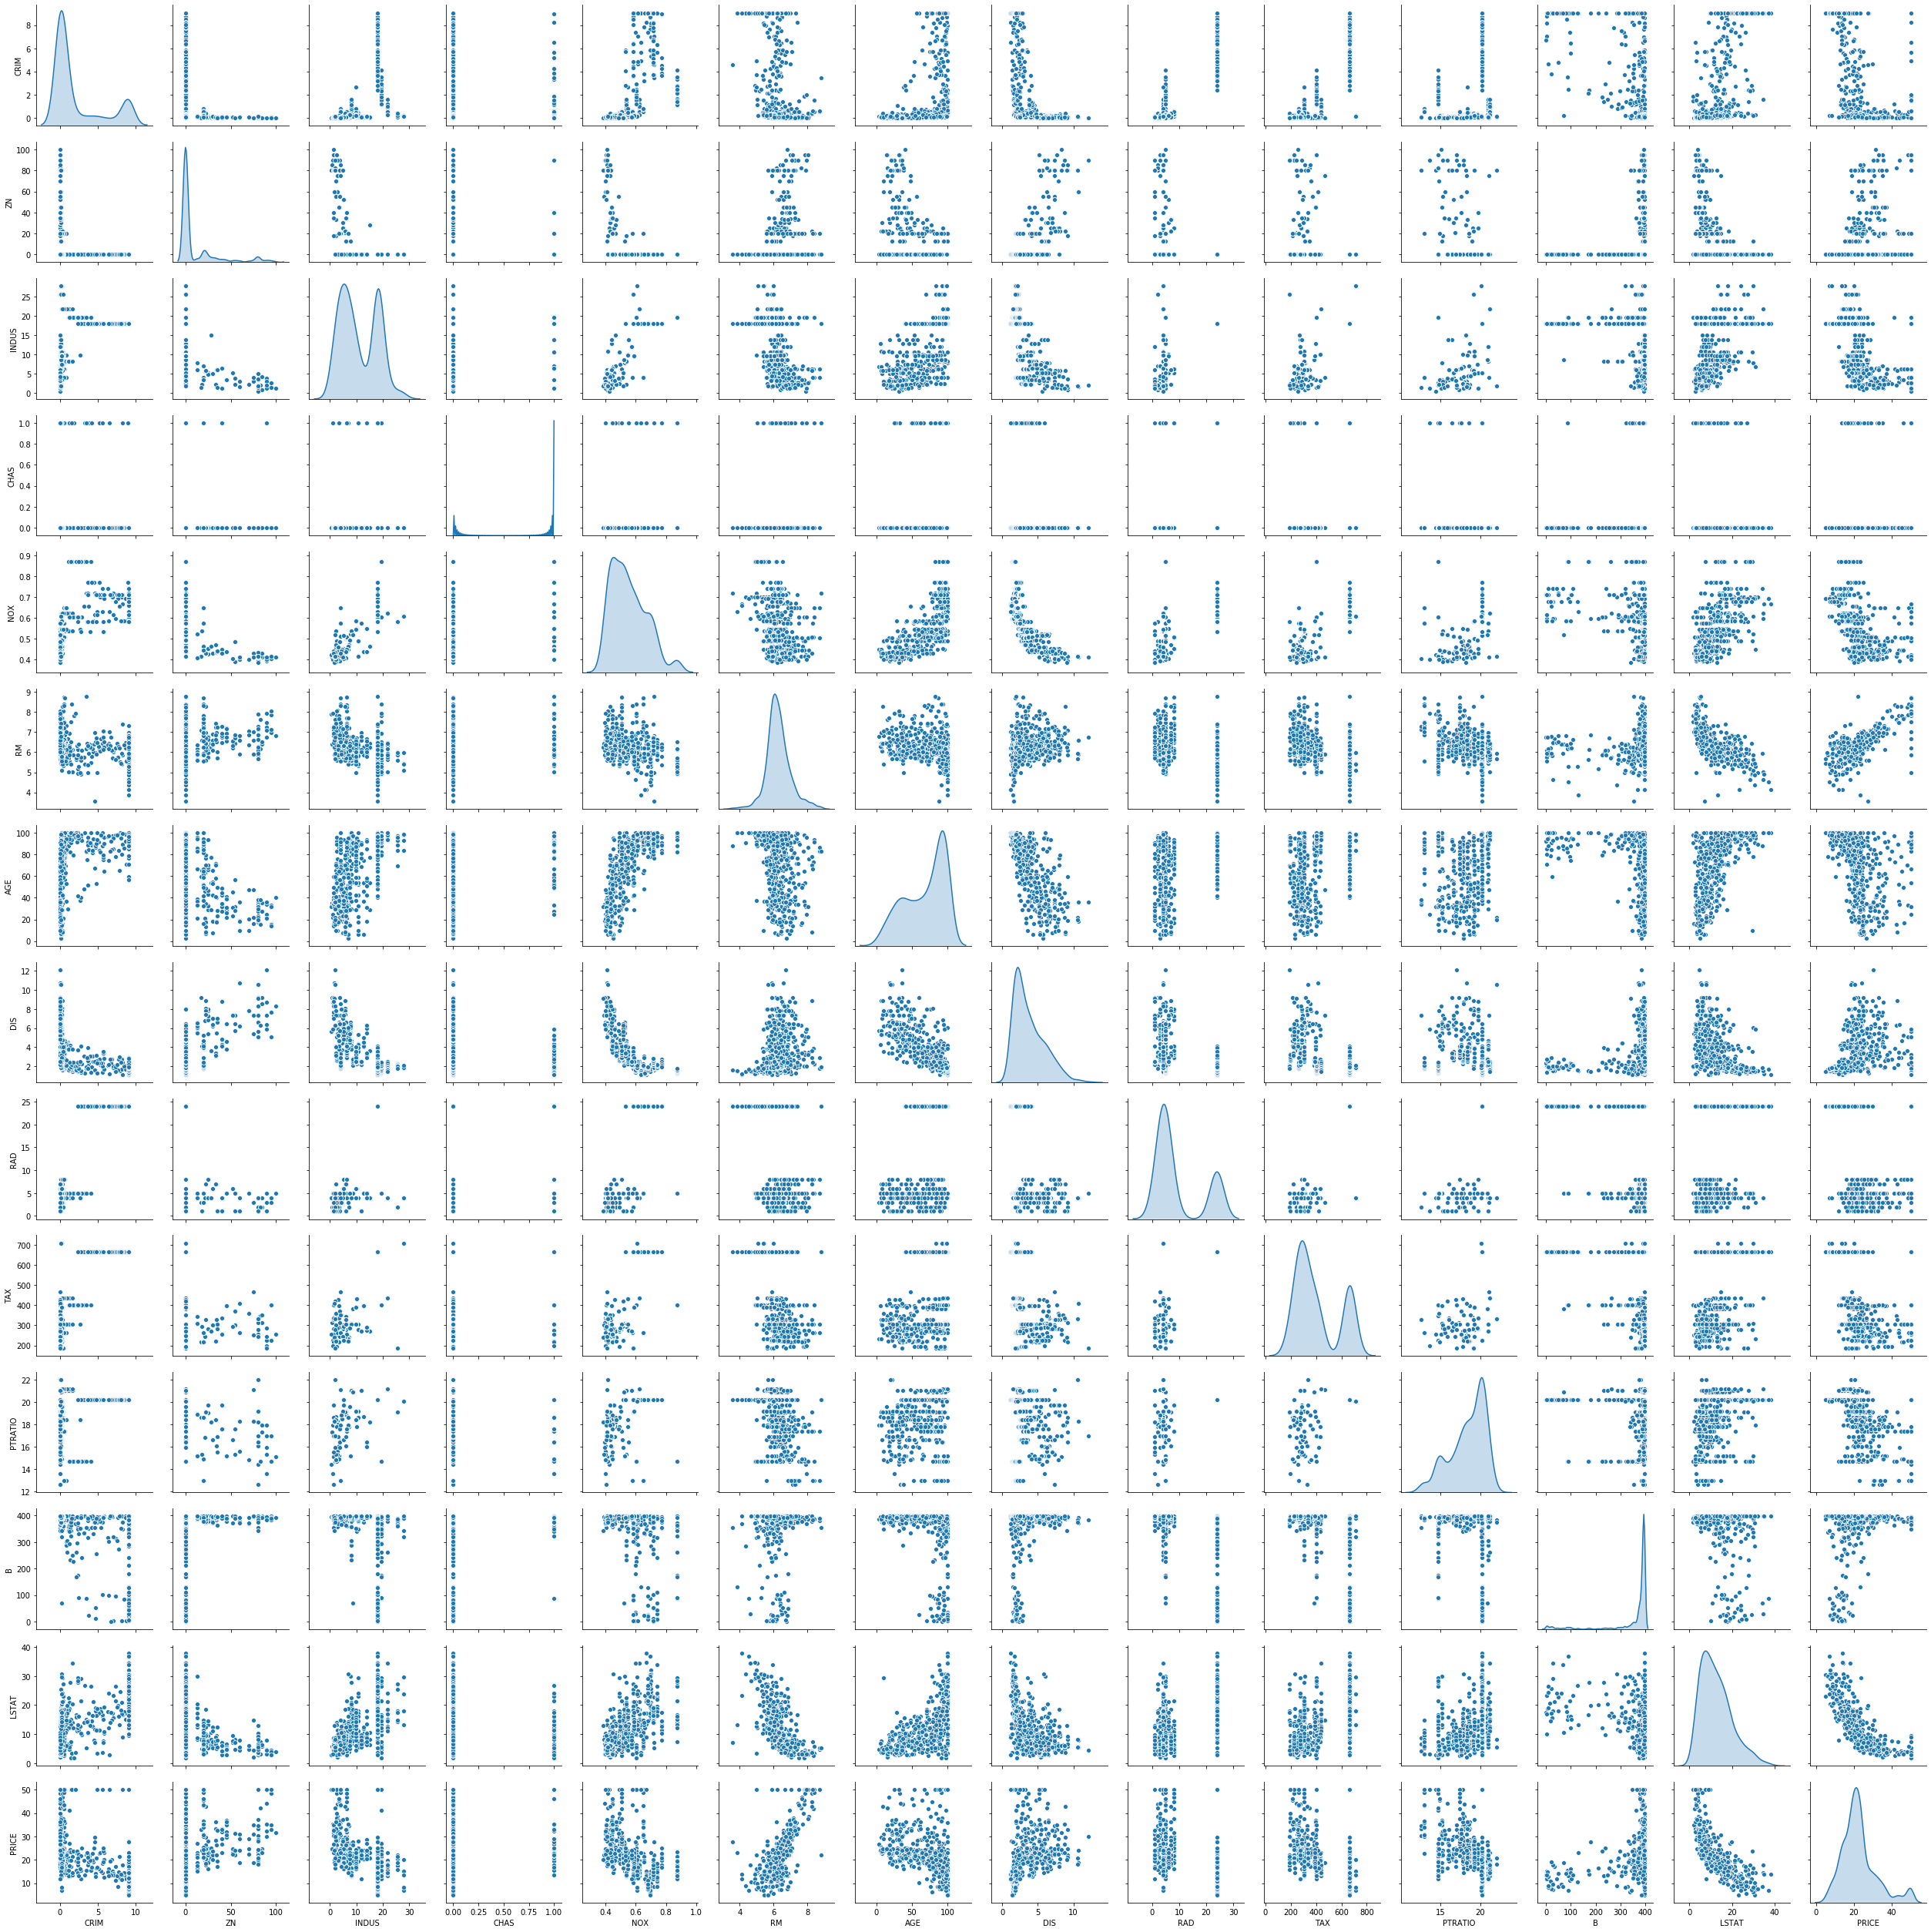

In [50]:
sns.pairplot(bos,diag_kind='kde',)

# Univariat annalysis
-As we know the distance between mean & median is very closer to each other it means it wont affect the the normal distribuction.

-RM ,DIS and LSTAT have the closest shape to normal distributions.

-AGE is skewed to the left and LSTAT is skewed to the right (this may seem counter intuitive but skew is defined in terms of where the mean is positioned in relation to the max).

-For TAX, we find a large amount of the distribution is around 700. This is also evident from the scatter plots


# Multivarient annlysis
-Prices of homes are primarily affected by location, size, municipal services, and class of neighborhood.

#RM
-For a higher RM, one would expect to observe a higher PRICE.
This is because more rooms would imply more space, thereby costing more, taking all other factors constant.

#LSTAT
-For a higher LSTAT, one would expect to observe a lower PRICE.
The social milieux in an area dominated by "lower class" citizens may not be conducive for young children. It may also be relatively unsafe compared to an area dominated by "upper class" citizens. Hence an area with more "lower class" citizens would lower demand, hence lower prices.

#PTRATIO
-For a higher LSTAT, one would expect to observe a lower price.
This is because there would be a lower teacher-to-student ratio resulting in less attention dedicated to each student that may impair their performance in school. Typically this is the scenario in public/state schools compared to private schools. And the prices of houses around public schools are generally lower than those around private schools. Hence one would expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas.

# Based on the above observations we will plot an lmplot between RM and PRICE to see the relationship between the two more clearly.

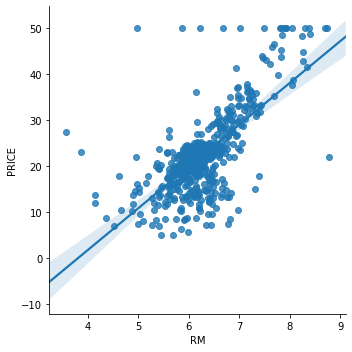

In [51]:
sns.lmplot(x = 'RM', y = 'PRICE', data = bos)

In [52]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Splitting the data into Training and Test Data.

In [53]:
X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
y = bos['PRICE']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
X_train.shape,X_test.shape

((354, 13), (152, 13))

In [55]:
X = bos["RM"]
y = bos["PRICE"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 01 May 2020   Prob (F-statistic):           2.49e-74
Time:                        05:38:10   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It can be clearly seen that the addition of the constant term has a direct effect on the coefficient term. Without the constant term, our model was passing through the origin, but now you have some y-intercept point.

In [56]:
X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
y = bos['PRICE']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              884.8
Date:                Fri, 01 May 2020   Prob (F-statistic):                        0.00
Time:                        05:38:10   Log-Likelihood:                         -1525.6
No. Observations:                 506   AIC:                                      3077.
Df Residuals:                     493   BIC:                                      3132.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.4089      0.211     -1.939      0.053      -0.823       0.006
ZN             0.0497      0.015      3.410      0.001       0.021       0.078
INDUS          0.0033      0.065      0.052      0.959      -0.124       0.130
CHAS           2.8320      0.909      3.116      0.002       1.046       4.618
NOX           -2.1620      3.377     -0.640      0.522      -8.797       4.473
RM             5.9058      0.310     19.046      0.000       5.297       6.515
AGE           -0.0068      0.014     -0.492      0.623      -0.034       0.020
DIS           -0.9731      0.198     -4.925      0.000      -1.361      -0.585
RAD            0.2472      0.091      2.730      0.007       0.069       0.425
TAX           -0.0094      0.004     -2.390      0.017      -0.017      -0.002
PTRATIO       -0.4140      0.111     -3.746      0.000      -0.631      -0.197
B              0.0145      0.003      5.259      0.000       0.009       0.020
LSTAT         -0.4128      0.052     -7.905      0.000      -0.515      -0.310
==============================================================================
Omnibus:                      208.513   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1510.454
Skew:                           1.625   Prob(JB):                         0.00
Kurtosis:                      10.816   Cond. No.                     8.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model has a much higher R-squared value — 0.959, which means that this model captures 95.9% of the variance in the dependent variable.

In [60]:
# Fitting Multi Linear regression model to training model 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train,y_train ) 

# predicting the test set results 
y_pred = regressor.predict(X_test) 
y_pred


array([31.64942161, 31.6715652 , 30.87377695, 22.09990582, 19.07488039,
       16.56449721, 35.6670839 , 14.67830801, 24.93547696, 37.35922098,
       21.56235111, 31.04307986, 27.92944292, 33.92872015, 33.67804815,
       40.85829404, 24.28377575, 23.3216634 , 25.65817247, 21.64740873,
       32.51191812, 17.62206885, 25.67694867, 24.97143525, 32.58652338,
       20.63979622, 19.77845918, 16.12982235, 38.47713117,  0.90034065,
       32.35359638, 32.39592056, 26.11359171, 23.66193107, 20.65491532,
       19.91116555,  3.48224972, 35.10620728, 26.75651148, 27.47123675,
       34.65154292, 29.94375247, 16.97492793, 31.26432763, 17.86503906,
       28.6092212 , 20.14995846, 20.77518575, 38.18575164, 16.29923925,
       23.97266686, 19.37684115, 24.7446707 , 34.0642712 , 26.53167247,
       35.0606774 , 21.27166451, 20.28214943, 17.77487894, 24.72907943,
       19.67470875, 23.77184431, 39.27023909, 42.99075424, 30.45195719,
       17.05306461, 23.69913171,  3.63699633, 31.3363206 , 28.84

In [ ]:
# Plotting Scatter graph to show the prediction 
# results - 'ytrue' value vs 'y_pred' value 
plt.scatter(y_test, y_pred, c = 'orange') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 


In [ ]:
# successfully predict the price in boton data set.